## Data Content
* Age: Age of the patient.
* Sex: Sex of the patient.
* exang: exercise induced angina (1 = yes; 0 = no).
* ca: number of major vessels (0-3).
* cp: Chest Pain type.
* Value 0: typical angina.
* Value 1: atypical angina.
* Value 2: non-anginal pain.
* Value 3: asymptomatic.
* trtbps: resting blood pressure (in mm Hg).
* chol: cholestoral in mg/dl fetched via BMI sensor.
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false).
* rest_ecg: resting electrocardiographic results.
* Value 0: normal.
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV).
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria.
* thalach: maximum heart rate achieved.
* target: 0= less chance of heart attack 1= more chance of heart attack.

## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Read and Analyse the Data

In [6]:
df = pd.read_csv("heart.csv")

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* In the dataset there are total 303 entries.
* All column are numeric values. 
* Column Dtype are float64(1), int64(13).

### Shape of dataset

In [9]:
print("Total rows in the dataset is:",df.shape[0],"Rows")
print("Total columns in the dataset is:",df.shape[1],"Columns")

Total rows in the dataset is: 303 Rows
Total columns in the dataset is: 14 Columns


In [10]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


* A positive distribution is found in the chol column.
* A normal distribution is found in the remaining column. 

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

* No null values are found in this dataset.
* All the columns are not null.

### Co-relation between the columns

In [12]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Exploratory Data Analysis ( EDA )

### Pairplot
* Pairplot is used to plot pairwise relationships in a dataset.

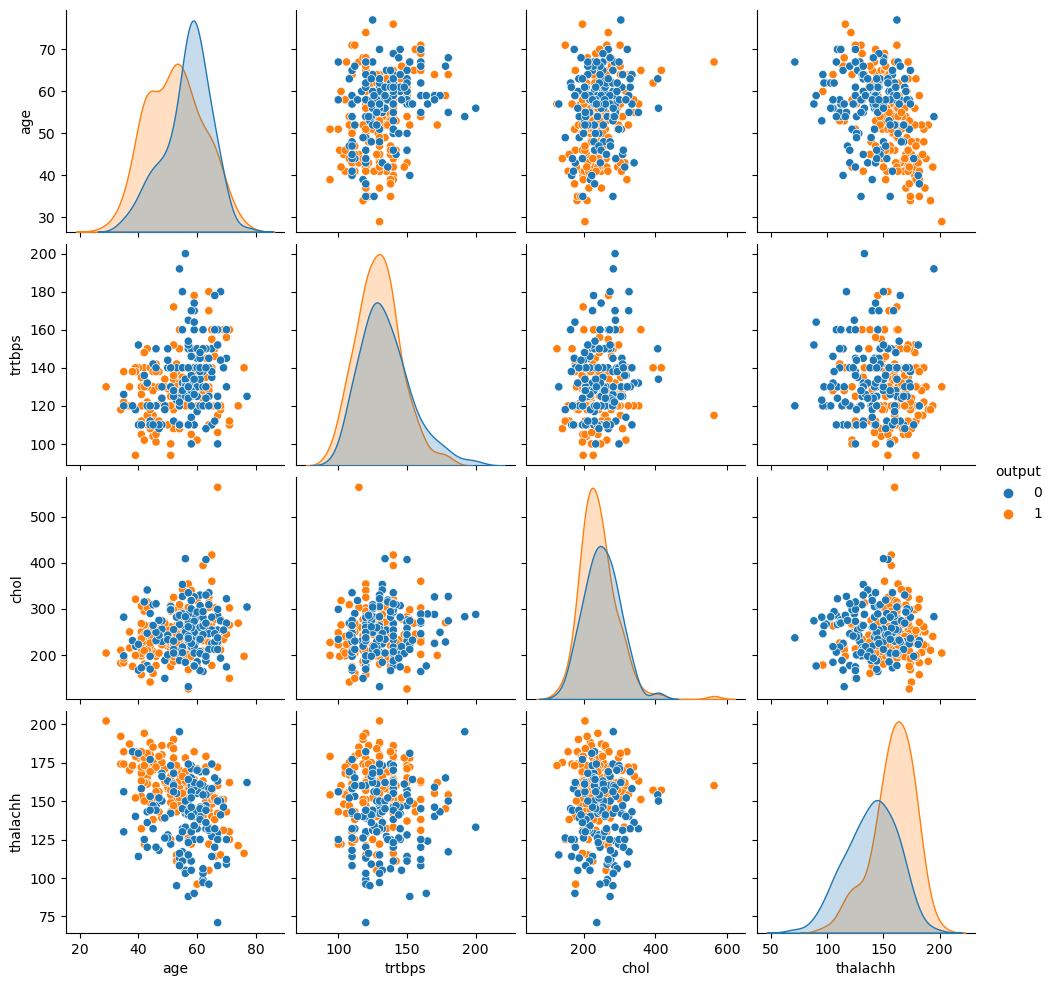

In [13]:
sns.pairplot(df[["age","trtbps","chol","thalachh","output"]],hue="output")

### Heatmap
* A heatmap to visualize the relationships between features.

<Axes: >

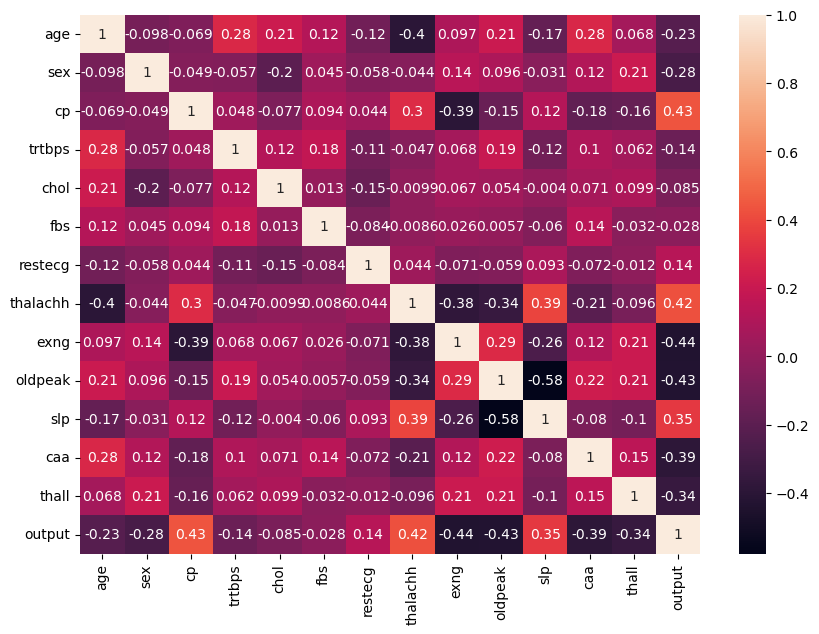

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [15]:
cat_col = ["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]
cont_col = ["age","trtbps","chol","thalachh","oldpeak"]

###  Countplot 
* The countplot is used to represent the counts of the observation present in the categorical variable.

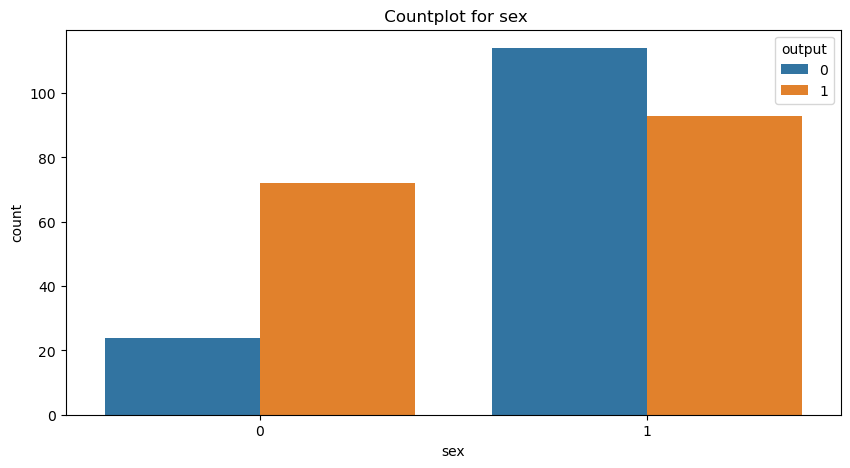

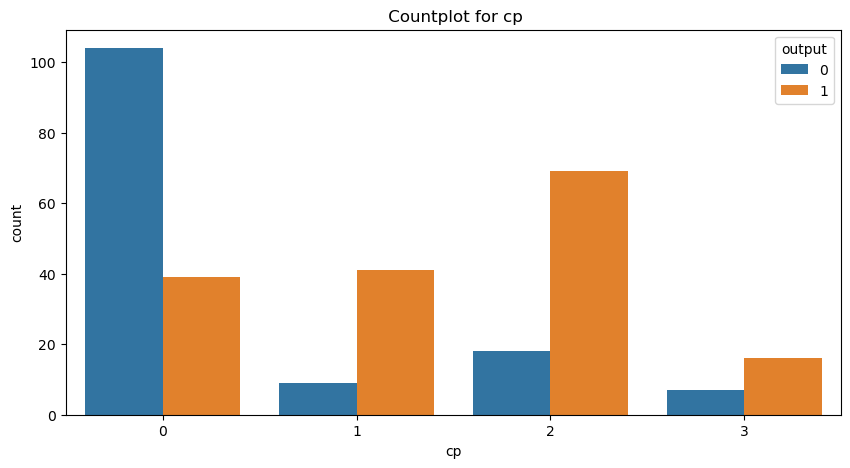

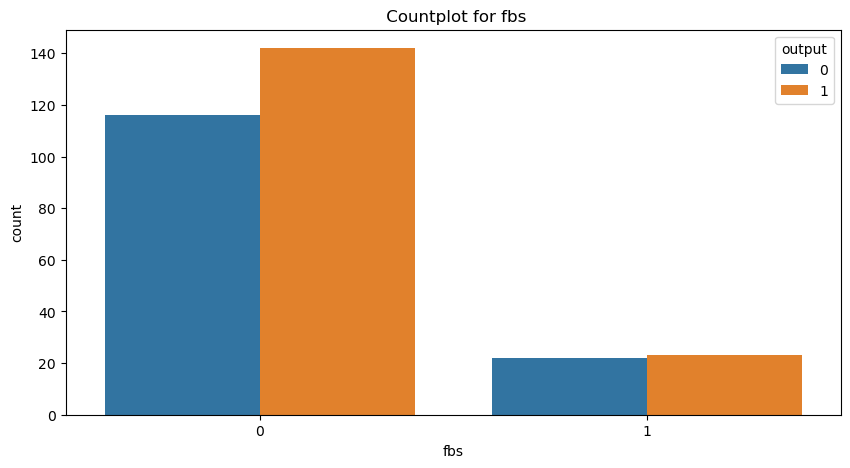

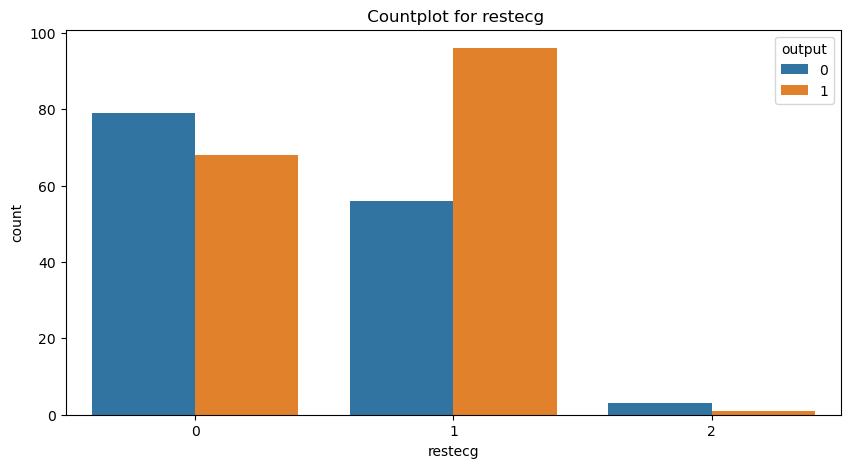

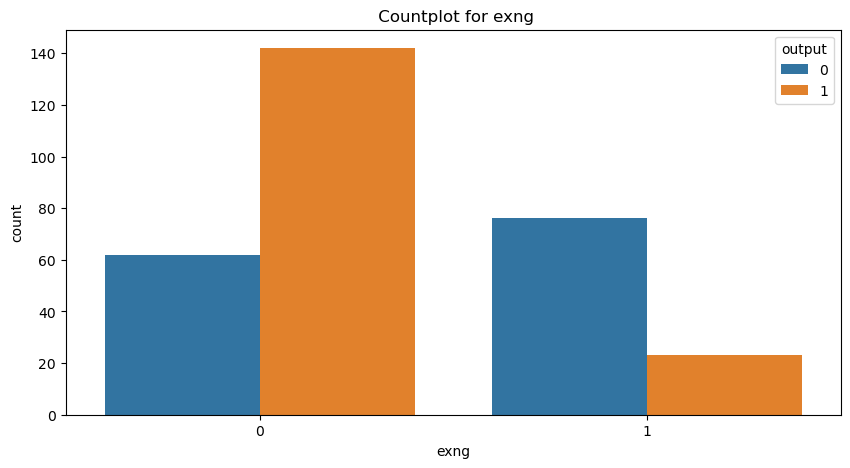

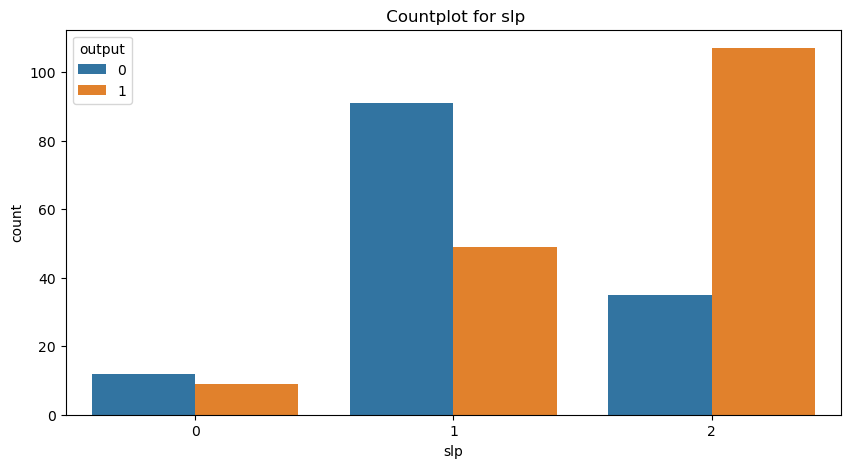

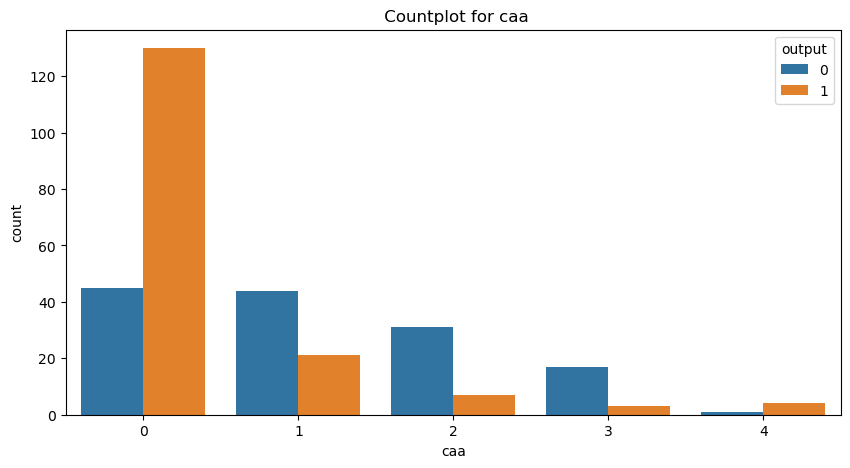

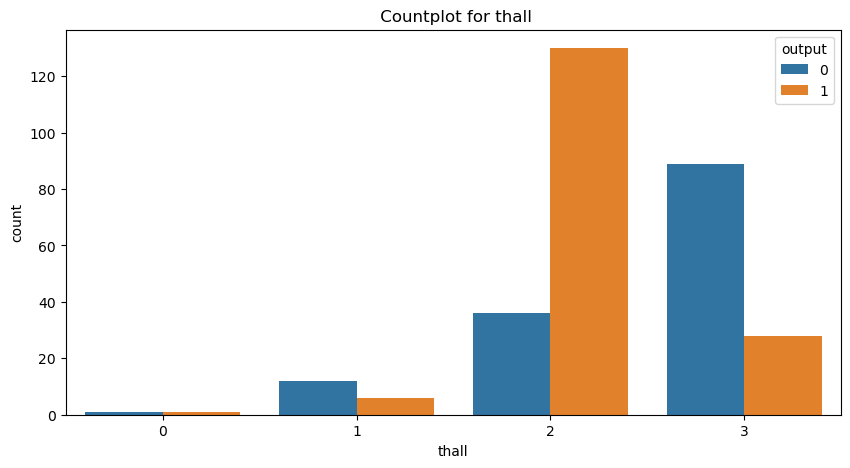

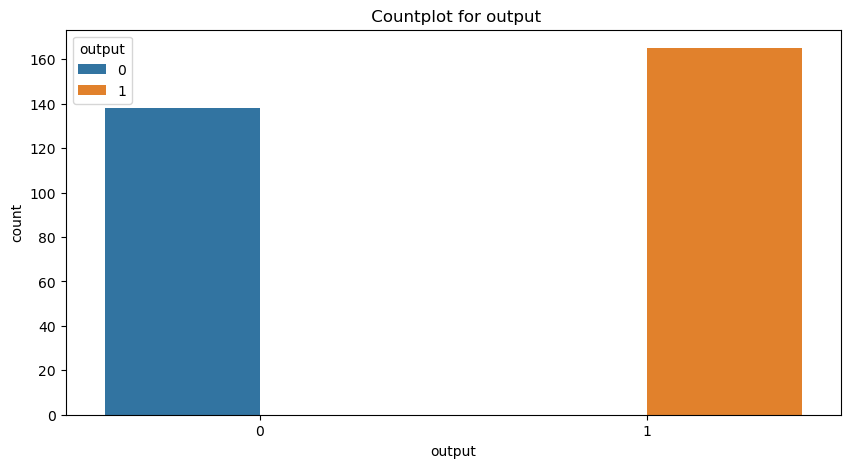

In [16]:
for i in cat_col:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,x=i,hue="output")
    plt.title(f" Countplot for {i}")
    plt.xlabel(i)
    plt.show()

*  More chances of heart attack of men is higher than the woman.
*  A person with typical angina has a lower risk of heart attack and a person with non-anginal pain has a higher risk of heart attack
*  Person with fasting blood sugar greaterthan 120 mg/dl is the most high chances of heart attack.

### Distplot 
* Seaborn Distplot represents the overall distribution of continuous data variables.

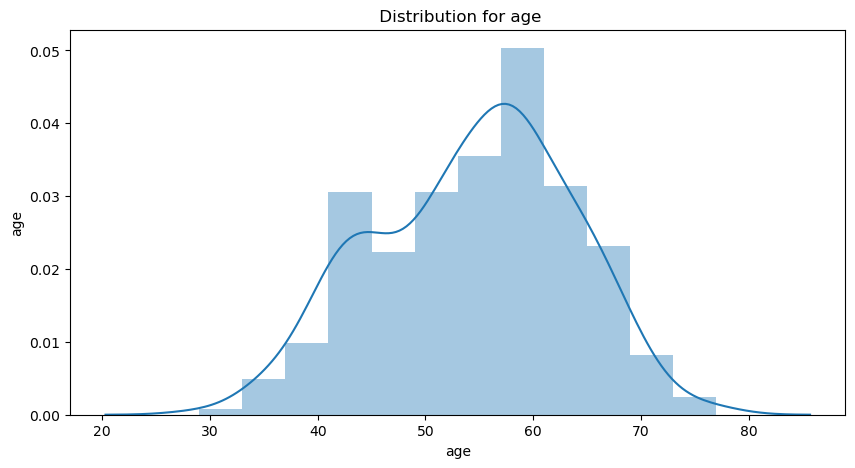

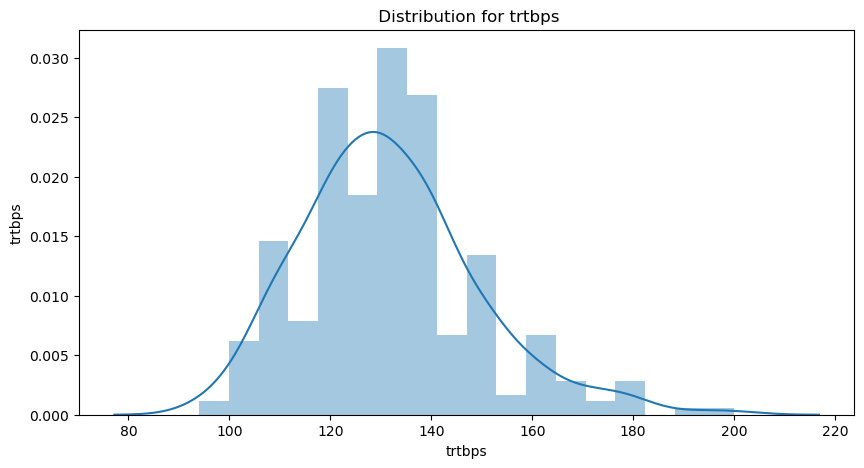

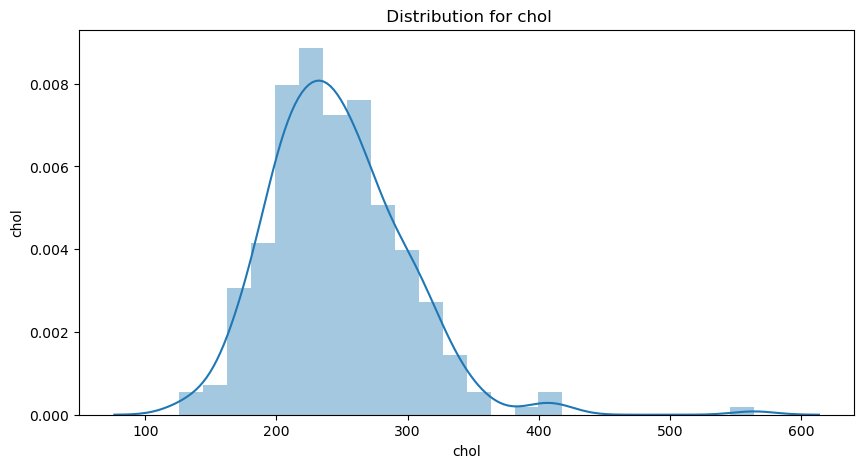

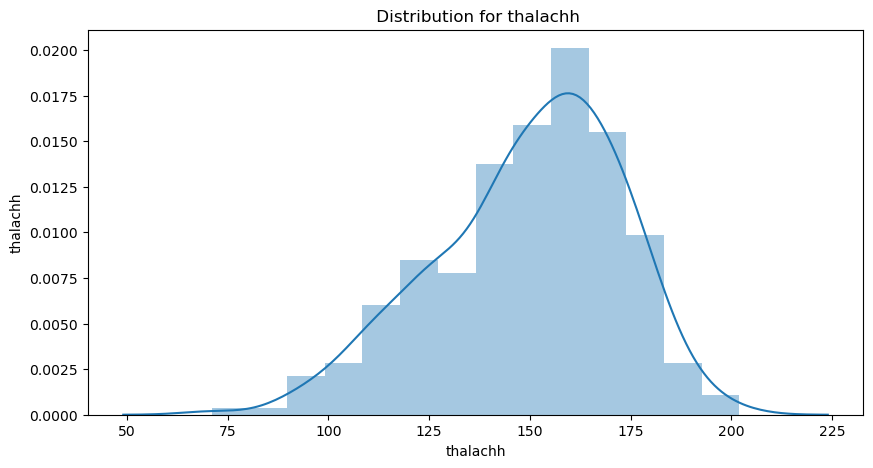

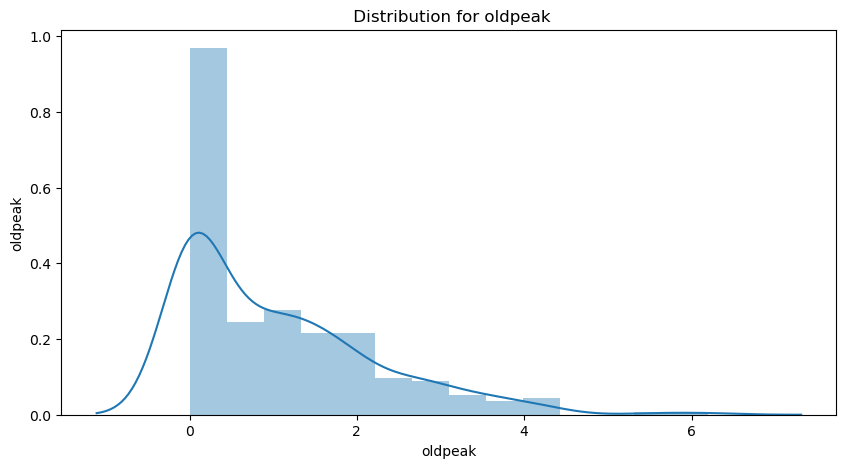

In [17]:
for i in cont_col:
    plt.figure(figsize=(10,5))
    sns.distplot(df[i])
    plt.title(f" Distribution for {i}")
    plt.ylabel(i)
    plt.show()

* The minimum value of the "age" is 28, and the maximum value is 78. And most the distribution was found in the 55 to 60 age group. 
* The minimum value of the "trtbps" is 92, and the maximum value is 182. And most the distribution was found in the 135 to 140 trtbps group.
* The minimum value of the "chol" is 120, and the maximum value is 410. And most the distribution was found in the 200 to 300 chol group.
* The minimum value of the "thalachh" is 70, and the maximum value is 200. And most the distribution was found in the 150 to 170 thalachh group.

### Pie Chart
* Pie charts are used to compare the data and to analyze which data is bigger or smaller.

<Axes: ylabel='cp'>

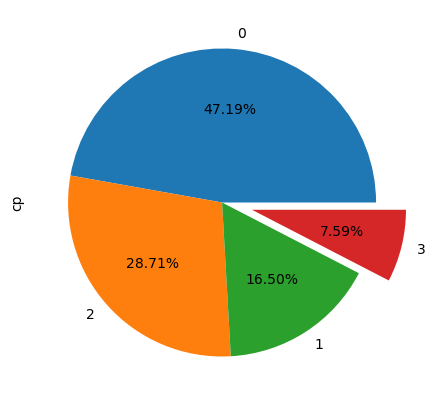

In [51]:
explode=[0,0,0,0.2]
df["cp"].value_counts().plot(kind="pie",autopct="%.2f%%",figsize=(5,5),explode=explode)

* Value 0: typical angina - 47.19%
* Value 1: atypical angina - 16.50%
* Value 2: non-anginal pain - 28.71%
* Value 3: asymptomatic - 7.59%


* In the dataset, "typical angina" chest pain has been found to be the highest and "asymptomatic" chest pain has been found to be the lowest.

### A boxplot was used to see if there were outliers in the columns.

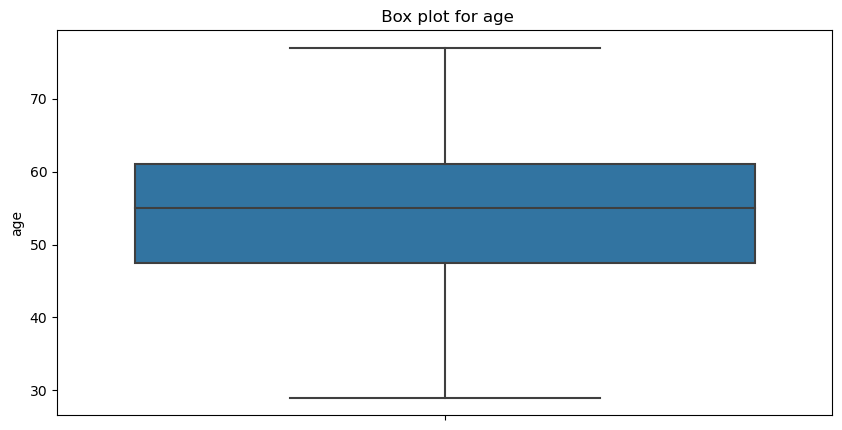

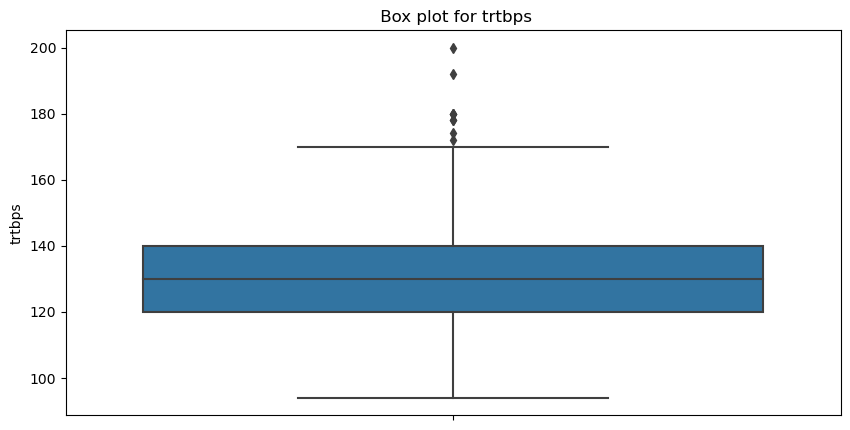

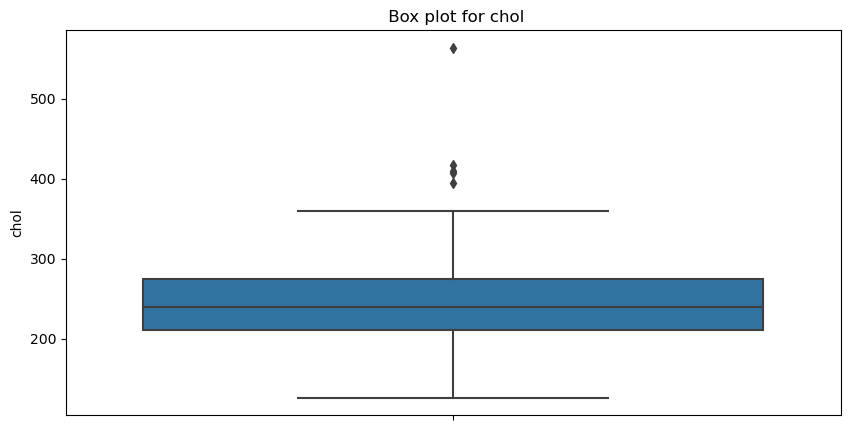

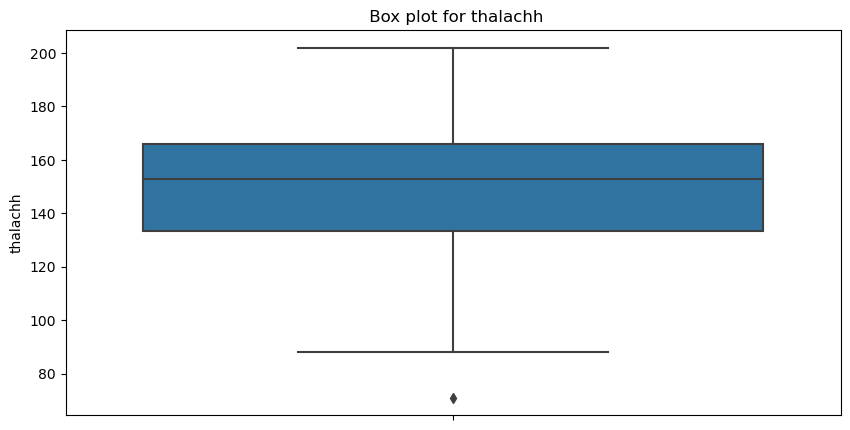

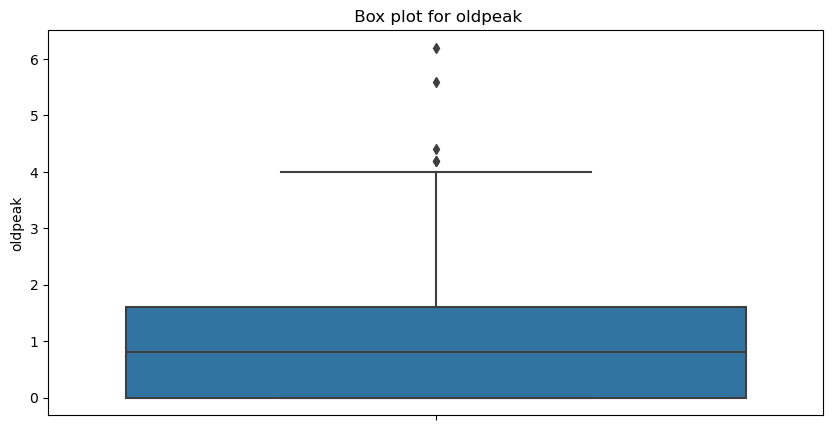

In [18]:
for i in cont_col:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df,y=i)
    plt.title(f" Box plot for {i}")
    plt.ylabel(i)
    plt.show()

## Outlier Detection

* Outliers are found in the following columns.
1. trtbps
2. chol 
3. thalachh
4. oldpeak

* When we examine the boxplots, we can see that there are some outlier values. We will clean these in the next step. 

* As a result, I decided to delete the outlier values from the dataset.
* In the next step, the data will be cleaned by finding outliers in the row of the columns and deleting them.

### Creating Features and Target

In [19]:
features = df.iloc[:,:-1]
target = df.iloc[:,-1]

### Data Cleaning

In [20]:
features[(features["trtbps"]>(165))].index 

Int64Index([8, 101, 110, 152, 195, 203, 223, 228, 241, 248, 260, 266, 292], dtype='int64')

In [21]:
features.drop([8, 101, 110, 152, 195, 203, 223, 228, 241, 248, 260, 266, 292],axis=0,inplace=True)
target.drop([8, 101, 110, 152, 195, 203, 223, 228, 241, 248, 260, 266, 292],axis=0,inplace=True)

 * Outliers are found in "trtbps" column and deleted.

In [22]:
features[(features["chol"]>(350))].index 

Int64Index([4, 28, 39, 85, 96, 180, 220, 246], dtype='int64')

In [23]:
features.drop([4, 28, 39, 85, 96, 180, 220, 246],axis=0,inplace=True)
target.drop([4, 28, 39, 85, 96, 180, 220, 246],axis=0,inplace=True)

* Outliers are found in "chol" column and deleted.

In [24]:
features[(features["thalachh"]<(80))].index 

Int64Index([272], dtype='int64')

In [25]:
features.drop(272,axis=0,inplace=True)
target.drop(272,axis=0,inplace=True)

* Outliers are found in "thalachh" column and deleted.

In [26]:
features[(features["oldpeak"]>(4))].index 

Int64Index([204, 221, 250, 291], dtype='int64')

In [27]:
features.drop([204,221,250,291],axis=0,inplace=True)
target.drop([204,221,250,291],axis=0,inplace=True)

* Outliers are found in "oldpeak" column and deleted.

In [28]:
out_re = ["age","trtbps","chol","thalachh","oldpeak"]

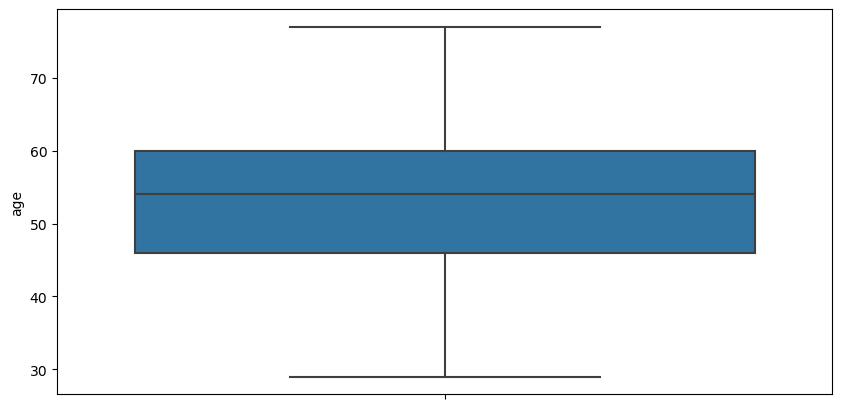

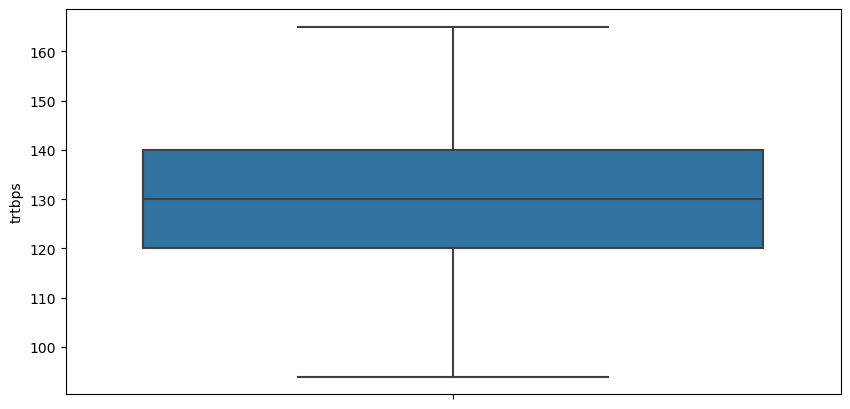

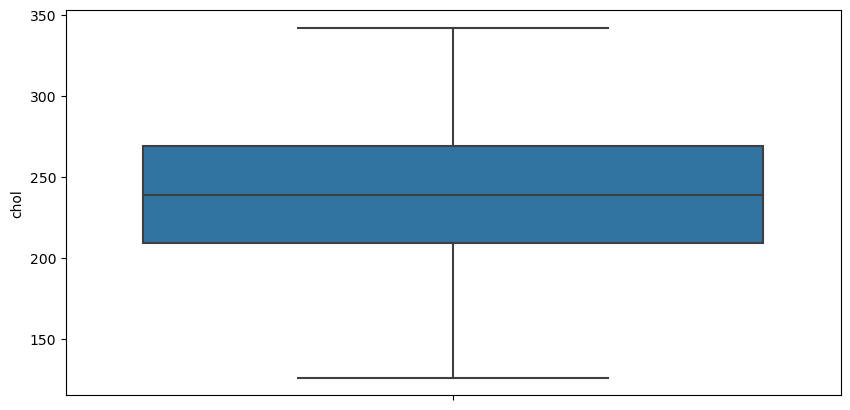

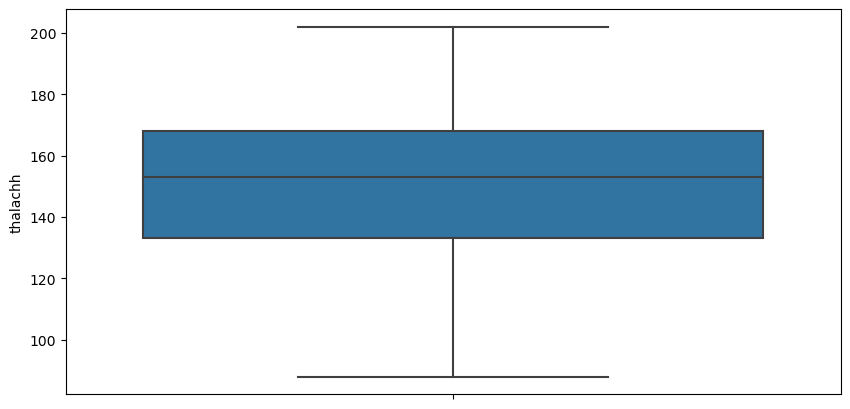

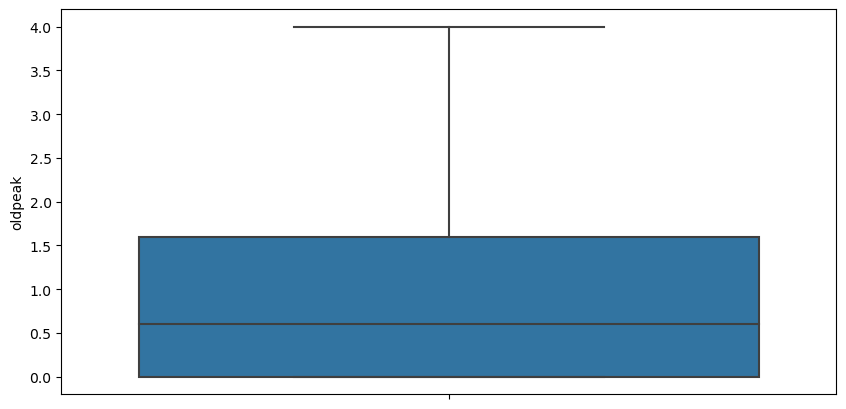

In [29]:
for i in out_re:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=features,y=i)
    plt.show()

### The outliers found in the dataset has been cleaned and the data has been balanced.

In [30]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       277 non-null    int64  
 1   sex       277 non-null    int64  
 2   cp        277 non-null    int64  
 3   trtbps    277 non-null    int64  
 4   chol      277 non-null    int64  
 5   fbs       277 non-null    int64  
 6   restecg   277 non-null    int64  
 7   thalachh  277 non-null    int64  
 8   exng      277 non-null    int64  
 9   oldpeak   277 non-null    float64
 10  slp       277 non-null    int64  
 11  caa       277 non-null    int64  
 12  thall     277 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.3 KB


In [31]:
target.info()

<class 'pandas.core.series.Series'>
Int64Index: 277 entries, 0 to 302
Series name: output
Non-Null Count  Dtype
--------------  -----
277 non-null    int64
dtypes: int64(1)
memory usage: 4.3 KB


#### After balancing the dataset data as follows:
* In the dataset there are total 277 entries.
* All column are numeric values. 
* Column Dtype are float64(1), int64(13).

### Data Scaling
* Standardization to bring numerical values into a common range.
* Scaling the data can help to balance the impact of all variables on the distance calculation and can help to improve the performance of the algorithm.
* For preprocessing I used Standard Scaler algorithm.

#### Importing Standard Scaler

In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
features[out_re[:-1]] = ss.fit_transform(features[out_re[:-1]])

In [33]:
features.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.994230,1,3,1.076424,-0.173356,1,0,-0.002524,0,2.3,0,0,1
1,-1.831517,1,2,0.051082,0.219868,0,1,1.614558,0,3.5,0,0,2
2,-1.396787,0,1,0.051082,-0.844151,0,0,0.958984,0,1.4,2,0,2
3,0.233452,1,1,-0.632479,-0.103964,0,1,1.221213,0,0.8,2,0,2
5,0.342134,1,0,0.734643,-1.121722,0,1,-0.089934,0,0.4,1,0,1


* Preprocessing has been done in the dataset.
* Standard Scaler removed the mean and scales each feature/variable to unit variance.
* In the next step, the data will be split by the Train Test Split function.

### Train Test Split
#### Importing Train Test Split function

In [34]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features,target,test_size=0.30,random_state=100)

In [35]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((193, 13), (84, 13), (193,), (84,))

##### The data is split as follows:
* Training data : 193 Rows
* Testing data : 84 Rows

### Models
#### Importing Machine Learning models

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

#### Importing Classification Report

In [37]:
from sklearn.metrics import classification_report

### Created a function to call model

In [38]:
def my_model(model):
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  cr = classification_report(ytest,ypred)
  print(cr)
  return model

### Training the model using Logistic Regression

In [39]:
my_model(LogisticRegression())

              precision    recall  f1-score   support

           0       0.86      0.66      0.75        38
           1       0.76      0.91      0.83        46

    accuracy                           0.80        84
   macro avg       0.81      0.79      0.79        84
weighted avg       0.81      0.80      0.79        84



LogisticRegression()

##### Logistic Regression Accuracy is : 80%

### Training the model using Decision Tree Classifier

In [40]:
my_model(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        38
           1       0.78      0.85      0.81        46

    accuracy                           0.79        84
   macro avg       0.79      0.78      0.78        84
weighted avg       0.79      0.79      0.78        84



DecisionTreeClassifier()

##### Decision Tree Classifier Accuracy is : 79%

### Training the model using Random Forest Classifier

In [41]:
my_model(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.89      0.63      0.74        38
           1       0.75      0.93      0.83        46

    accuracy                           0.80        84
   macro avg       0.82      0.78      0.79        84
weighted avg       0.82      0.80      0.79        84



RandomForestClassifier()

##### Random Forest Classifier Accuracy is : 80%

### Training the model using Ada Boost Classifier

In [42]:
my_model(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        38
           1       0.81      0.85      0.83        46

    accuracy                           0.81        84
   macro avg       0.81      0.81      0.81        84
weighted avg       0.81      0.81      0.81        84



AdaBoostClassifier()

##### Ada Boost Classifier Accuracy is : 81%

### Training the model using Gradient Boosting Classifier

In [43]:
my_model(GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.90      0.68      0.78        38
           1       0.78      0.93      0.85        46

    accuracy                           0.82        84
   macro avg       0.84      0.81      0.81        84
weighted avg       0.83      0.82      0.82        84



GradientBoostingClassifier()

##### Gradient Boosting Classifier Accuracy is : 82%

### Training the model using SVC

In [47]:
my_model(SVC())

              precision    recall  f1-score   support

           0       0.88      0.61      0.72        38
           1       0.74      0.93      0.83        46

    accuracy                           0.79        84
   macro avg       0.81      0.77      0.77        84
weighted avg       0.81      0.79      0.78        84



SVC()

##### SVC Accuracy is : 79%

## I tried various models, but the Gradient Boosting Classifier gave the highest score.